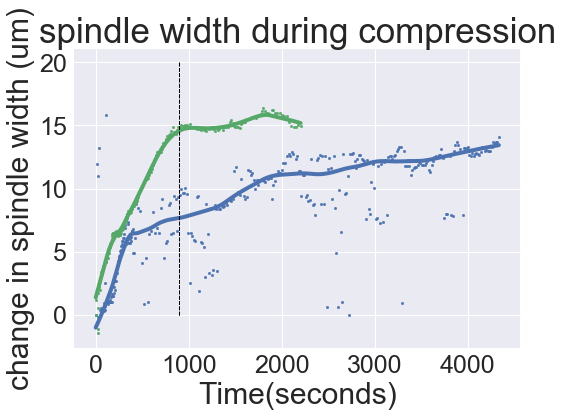

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import datetime
import re
import statsmodels.api as sm
from scipy.interpolate import interp1d
plt.style.use('seaborn')

        

def measure_distance(data):
    distancelist = []
    for j in range(1, numcolumns): #iterate through each frame/timepoint
        mean = summary.iloc[1,j]
        std = summary.iloc[2,j]
        lst = []
        for i in range(numrows): #loop through the values in a timepoint  and add the index to the lst
            if data.iloc[i,j] >= (mean + std):
                lst += [i]
            else:
                continue
        # find the min and max indices in the origial dataset for the given timepoint
        minimum =  min(lst)
        maximum =  max(lst)
        
        #calculate distance at that timepoint
        distance = data.iloc[maximum,0] - data.iloc[minimum,0]
        
        # add that distance to the list for that timepoint
        distancelist += [distance]
    return distancelist
 
def percent_change(distancelist):
    percentchange = []
    for elem in distancelist:
        percentchange += [elem - distancelist[0]]
    return percentchange
       
def time_seconds(timelist):
    newtimepoints = []
    for elem in timelist:
        newtimepoints +=  [re.search('\(([^)]+)', elem).group(1)]
    
    finaltimepoint = []
    for elem in newtimepoints:
        finaltimepoint += [float(elem)]
    return finaltimepoint


if __name__ == '__main__':
    files = 1
    while files < 3:
        name = "Results" + str(files)+ ".csv"
        data = pd.read_csv(name)
        data = data.drop(data.columns[0], axis=1)
        files+=1

        summary = data.describe()

        numrows = len(data)
        numcolumns = len(data.columns)
        distanceframe = pd.DataFrame() 
        distancelist = measure_distance(data)
        percentchange = percent_change(distancelist)

        timepoint = list(data)
        timepoint = timepoint[1:]
        finaltimepoint = time_seconds(timepoint)

        lowess = sm.nonparametric.lowess(percentchange, finaltimepoint, frac=.2)
        # unpack the lowess smoothed points to their values
        lowess_x = list(zip(*lowess))[0]
        lowess_y = list(zip(*lowess))[1]
        # run scipy's interpolation. There is also extrapolation I believe
        f = interp1d(lowess_x, lowess_y, bounds_error=False)
        plt.plot(lowess_x, lowess_y, linestyle = '-', linewidth = 4)

        plt.scatter(finaltimepoint, percentchange, s=7)
        plt.xlabel("Time(seconds)", size = 30)
        plt.ylabel("change in spindle width (um)", size = 30)
        plt.xticks(size = 25)
        plt.yticks(size = 25)
        plt.title("spindle width during compression" , size = 35)

    #    plt.legend(("PURO", ""), fontsize = 20)
        # Create a line at a specic point along the x-axis
        plt.plot((900,900),(0,20),'black', linewidth = 1, linestyle = 'dashed')
        plt.show
    
